In [1]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil
from pathlib import Path
import zipfile

In [11]:
zip_path = 'Deepdive.zip'
extract_path = 'Deepdive_extracted'

# Extract ZIP file if not already extracted
if not os.path.exists(extract_path):
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f'Files extracted to {extract_path}')

# Define dataset directories
train_dir = os.path.join(extract_path, 'train')
validation_dir = os.path.join(extract_path, 'validation')
test_dir = os.path.join(extract_path, 'test')

# Print directories
print(f"Train Directory: {train_dir}")
print(f"Validation Directory: {validation_dir}")
print(f"Test Directory: {test_dir}")


Train Directory: Deepdive_extracted\train
Validation Directory: Deepdive_extracted\validation
Test Directory: Deepdive_extracted\test


In [12]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = validation_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2667 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.


Visualizing Training Images:


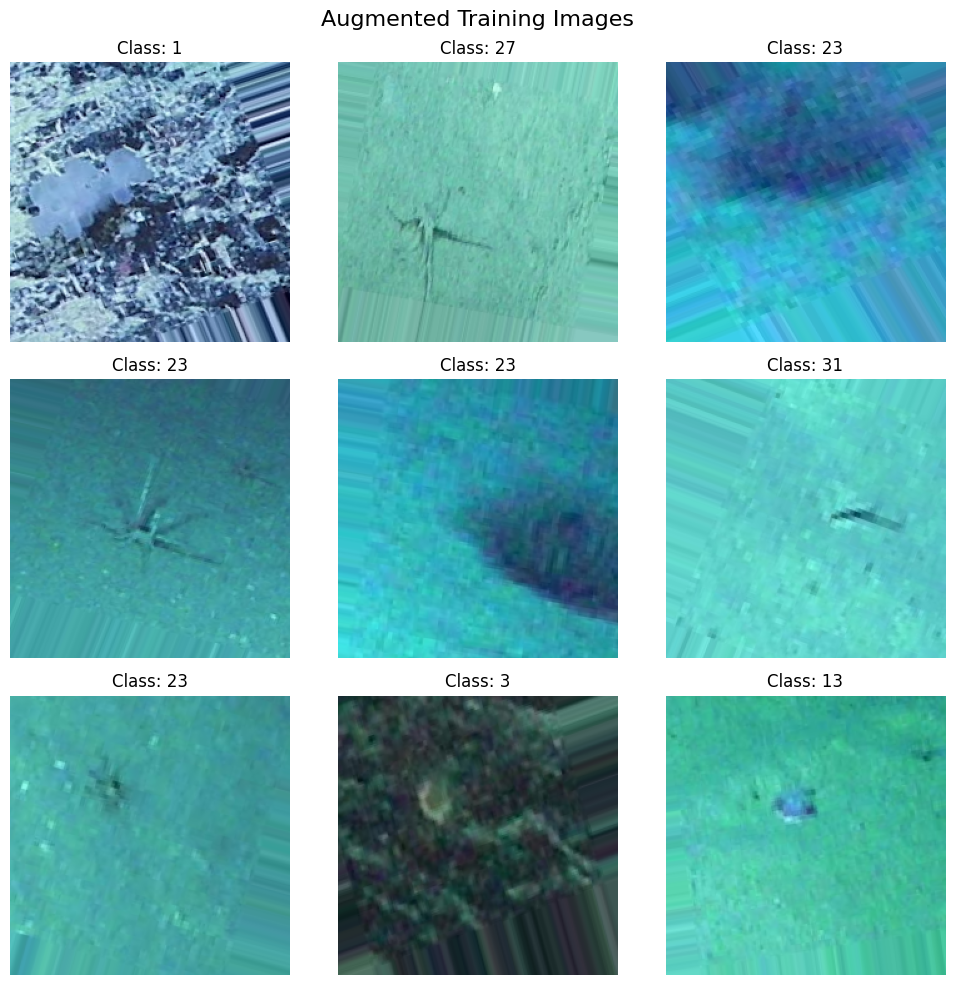

In [18]:
# Function to visualize images from a data generator
def visualize_images(generator, num_images=9, title="Sample Images"):
    images, labels = next(generator)  # Get a batch of images and labels
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(f"Class: {np.argmax(labels[i])}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize Training Data
print("Visualizing Training Images:")
visualize_images(train_generator, title="Augmented Training Images")